# Άσκηση 7 - Βαθιά Ενισχυτική Μάθηση

Ον/μο: Καρλάκη Μαρία ΑΕΜ: 244

Εγκατάσταση Βιβλιοθηκών

In [36]:
import gymnasium as gym
import ray
from ray.rllib.algorithms.ppo import PPOConfig
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.wrappers import RecordVideo
import glob
from IPython.display import HTML
from base64 import b64encode

In [37]:
!pip install swig
!pip install gymnasium[box2d]
!pip install ray[rllib]
!pip install renderlab

Ερώτημα 3

*   Η συνάρτηση step(action) υλοποιεί τη μετάβαση του περιβάλλοντος στην επόμενη κατάσταση, βάσει της ενέργειας που επιλέγει ο πράκτορας. Ως αποτέλεσμα το περιβάλλον επιστρέφει τη νέα παρατήρηση (observation), η οποία περιγράφει την επόμενη κατάσταση, την ανταμοιβή (reward) που δείχνει πόσο καλή ή κακή ήταν η ενέργεια, καθώς και δύο λογικές μεταβλητές (terminated και truncated) που υποδεικνύουν αν το επεισόδιο έχει ολοκληρωθεί είτε λόγω επιτυχίας/αποτυχίας είτε λόγω χρονικού περιορισμού. Επιπλέον επιστρέφεται και ένα λεξικό info με βοηθητικές πληροφορίες.

*   Η συνάρτηση reset() χρησιμοποιείται για την επαναφορά του περιβάλλοντος στην αρχική του κατάσταση και την έναρξη ενός νέου επεισοδίου. Πρέπει να καλείται πάντα πριν από την πρώτη κλήση της step() και κάθε φορά που ένα επεισόδιο ολοκληρώνεται. Η συνάρτηση επιστρέφει την αρχική παρατήρηση του περιβάλλοντος καθώς και ένα λεξικό info με συμπληρωματικές πληροφορίες. Η reset() μπορεί να δεχθεί προαιρετικά μια τιμή seed, η οποία ελέγχει την τυχαιότητα του περιβάλλοντος, επιτρέποντας την αναπαραγωγή των ίδιων πειραμάτων. Συνήθως το seed ορίζεται μία φορά αμέσως μετά τη δημιουργία του περιβάλλοντος και δεν αλλάζει ξανά.

*   Η συνάρτηση render() χρησιμοποιείται για την οπτικοποίηση της τρέχουσας κατάστασης του περιβάλλοντος, ώστε ο χρήστης να μπορεί να παρακολουθήσει τη συμπεριφορά του πράκτορα. Ο τρόπος απεικόνισης εξαρτάται από την παράμετρο render_mode που ορίζεται κατά τη δημιουργία του περιβάλλοντος. Για παράδειγμα με render_mode="human" το περιβάλλον εμφανίζεται σε παράθυρο για ανθρώπινη παρακολούθηση, ενώ με render_mode="rgb_array" επιστρέφεται μια εικόνα της κατάστασης με τη μορφή πίνακα numpy. Η render() είναι ιδιαίτερα χρήσιμη για την αξιολόγηση και την κατανόηση της συμπεριφοράς ενός εκπαιδευμένου πράκτορα.




Ερώτημα 4



*   Το Observation Space του περιβάλλοντος LunarLander-v2 αποτελείται από ένα διάνυσμα 8 συνεχών τιμών (8-dimensional vector), το οποίο περιγράφει την πλήρη κατάσταση του διαστημοπλοίου σε κάθε χρονική στιγμή. Περιλαμβάνει τη θέση του σκάφους στον οριζόντιο και κατακόρυφο άξονα, τις αντίστοιχες ταχύτητες, τη γωνία κλίσης και τη γωνιακή ταχύτητα, καθώς και δύο δυαδικές τιμές που υποδεικνύουν αν το αριστερό και το δεξί σκέλος του σκάφους βρίσκονται σε επαφή με το έδαφος. Ο τύπος του Observation Space είναι Box, γεγονός που σημαίνει ότι οι παρατηρήσεις ανήκουν σε συνεχές χώρο τιμών και εκφράζονται συνήθως ως πίνακας τύπου numpy.
*   Το Action Space του LunarLander-v2 είναι διακριτό και αποτελείται από 4 δυνατές ενέργειες, γεγονός που το καθιστά τύπου Discrete(4). Οι ενέργειες αυτές αντιστοιχούν στον έλεγχο των κινητήρων του διαστημοπλοίου: η πρώτη ενέργεια δεν ενεργοποιεί κανέναν κινητήρα, η δεύτερη ενεργοποιεί τον αριστερό κινητήρα προσανατολισμού, η τρίτη ενεργοποιεί τον κεντρικό κινητήρα που παράγει ώθηση προς τα πάνω, και η τέταρτη ενεργοποιεί τον δεξί κινητήρα προσανατολισμού. Μέσω αυτών των τεσσάρων ενεργειών, ο πράκτορας καλείται να ελέγξει την κίνηση και τον προσανατολισμό του σκάφους ώστε να επιτύχει ασφαλή προσγείωση.



Ερώτημα 5

In [58]:
env = gym.make("LunarLander-v3")
print("OK, env loaded:", env)
print("Obs space:", env.observation_space)
print("Action space:", env.action_space)
env.close()

OK, env loaded: <TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v3>>>>>
Obs space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Action space: Discrete(4)


In [39]:
ray.shutdown()
ray.init(ignore_reinit_error=True, include_dashboard=False)

2026-01-11 16:11:23,290	INFO worker.py:2007 -- Started a local Ray instance.


Python version:,3.12.12
Ray version:,2.53.0


In [40]:
config = (
    PPOConfig()
    .api_stack(
        enable_rl_module_and_learner=False,
        enable_env_runner_and_connector_v2=False
    )
)

config.use_critic = True
config.use_gae = True
config.lambda_ = 0.95
config.use_kl_loss = True
config.sgd_minibatch_size = 32
config.num_sgd_iter = 30
config.shuffle_sequences = True
config.vf_loss_coeff = 0.5
config.entropy_coeff = 0.001
config.clip_param = 0.2

agent = (
    config
    .environment("LunarLander-v3")
    .framework("torch")
    .build()
)

policy = agent.get_policy()
print(policy.model)

(pid=36756) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=36756) E0000 00:00:1768147904.165322   36756 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=36756) E0000 00:00:1768147904.175714   36756 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=36756) W0000 00:00:1768147904.202041   36756 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=36756) W0000 00:00:1768147904.202085   36756 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=36756) W0000 00:00:1768147904.202089   36756 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid lin

FullyConnectedNetwork(
  (_logits): SlimFC(
    (_model): Sequential(
      (0): Linear(in_features=256, out_features=4, bias=True)
    )
  )
  (_hidden_layers): Sequential(
    (0): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=8, out_features=256, bias=True)
        (1): Tanh()
      )
    )
    (1): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): Tanh()
      )
    )
  )
  (_value_branch_separate): Sequential(
    (0): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=8, out_features=256, bias=True)
        (1): Tanh()
      )
    )
    (1): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): Tanh()
      )
    )
  )
  (_value_branch): SlimFC(
    (_model): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)


Όταν δημιουργείται ο πράκτορας PPO και εκτελείται η εντολή εκτύπωσης του policy model (print(policy.model)), εμφανίζεται ένα νευρωνικό δίκτυο Actor–Critic με κοινό κορμό (shared network). Το δίκτυο λαμβάνει ως είσοδο το observation του περιβάλλοντος LunarLander (διάνυσμα 8 συνεχών τιμών) και το επεξεργάζεται μέσω διαδοχικών πλήρως συνδεδεμένων επιπέδων (fully connected layers), τα οποία εξάγουν μια κοινή αναπαράσταση της κατάστασης. Στη συνέχεια, το δίκτυο διαχωρίζεται σε δύο ξεχωριστά branches: το Actor (policy branch), το οποίο παράγει πιθανότητες για τις 4 διακριτές ενέργειες του περιβάλλοντος και το Critic (value branch), το οποίο παράγει μία μοναδική αριθμητική τιμή που αντιστοιχεί στη συνάρτηση αξίας V(s) της τρέχουσας κατάστασης. Η αρχιτεκτονική Actor-Critic μπορεί να υλοποιηθεί με δύο ανεξάρτητα δίκτυα, όμως στην παρούσα περίπτωση υλοποιείται ως ένα ενιαίο νευρωνικό δίκτυο με κοινά layers και δύο εξόδους, προκειμένου να βελτιώνεται η αποδοτικότητα και η σταθερότητα της εκπαίδευσης.

Ερώτημα 6

Iteration 1: Average Reward = -164.1610343640531
Iteration 2: Average Reward = -160.71400461823885
Iteration 3: Average Reward = -145.49649134331648
Iteration 4: Average Reward = -132.97289711832525
Iteration 5: Average Reward = -117.21446598796749
Iteration 6: Average Reward = -98.78180474920445
Iteration 7: Average Reward = -88.11343169629247
Iteration 8: Average Reward = -76.11517821686232
Iteration 9: Average Reward = -60.77534217279227
Iteration 10: Average Reward = -51.67326482261209
Iteration 11: Average Reward = -49.159082809938376
Iteration 12: Average Reward = -46.21964513852703
Iteration 13: Average Reward = -44.327381130584484
Iteration 14: Average Reward = -45.13673860415638
Iteration 15: Average Reward = -44.83332231135884
Iteration 16: Average Reward = -44.41576410574902
Iteration 17: Average Reward = -42.941128096143714
Iteration 18: Average Reward = -42.94809999925587
Iteration 19: Average Reward = -43.1734211266876
Iteration 20: Average Reward = -42.76104318799713
Ite

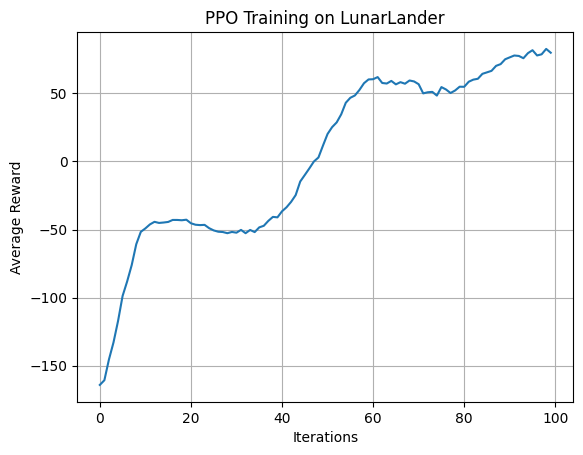

In [41]:
train_iterations = 100
average_rewards_per_iteration = []

for i in range(train_iterations):
    result = agent.train()

    average_reward = None

    if "episode_reward_mean" in result:
        average_reward = result["episode_reward_mean"]
    elif "sampler_results" in result and "episode_reward_mean" in result["sampler_results"]:
        average_reward = result["sampler_results"]["episode_reward_mean"]

    elif "episode_return_mean" in result:
        average_reward = result["episode_return_mean"]
    elif "env_runners" in result and "episode_return_mean" in result["env_runners"]:
        average_reward = result["env_runners"]["episode_return_mean"]

    else:
        hist = result.get("hist_stats", {})
        for k in ["episode_reward", "episode_rewards", "episode_return", "episode_returns"]:
            if k in hist and len(hist[k]) > 0:
                average_reward = float(np.mean(hist[k]))
                break

    average_rewards_per_iteration.append(average_reward)
    print(f"Iteration {i+1}: Average Reward = {average_reward}")

plt.plot(average_rewards_per_iteration)
plt.title("PPO Training on LunarLander")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()


Καταλαβαίνουμε ότι ο πράκτορας εκπαιδεύεται σωστά επειδή το μέσο reward ανά επανάληψη (average reward) παρουσιάζει γενική ανοδική τάση κατά τη διάρκεια της εκπαίδευσης και σταθεροποιείται σε σημαντικά υψηλότερες τιμές σε σχέση με την αρχή. Στα αποτελέσματα που παρουσιάζονται, ξεκινά από πολύ χαμηλές τιμές (περίπου -160), αυξάνεται σταδιακά και μετά από αρκετές επαναλήψεις γίνεται θετικό, ξεπερνώντας τις τιμές των 70-80 προς το τέλος της εκπαίδευσης. Η εξέλιξη αυτή δείχνει ότι ο πράκτορας μαθαίνει αποτελεσματικές πολιτικές ελέγχου, βελτιώνοντας συνεχώς τη συμπεριφορά του στο περιβάλλον. Παρά το γεγονός οτι παρατηρούνται μικρές διακυμάνσεις μεταξύ των διαδοχικών επαναλήψεων, η συνολική ανοδική τάση και η τελική σταθεροποίηση σε υψηλές τιμές αποτελούν ένδειξη επιτυχούς εκπαίδευσης.

Ερώτημα 7

In [61]:
env = gym.make("LunarLander-v3", render_mode="rgb_array", max_episode_steps = 3500)

env = RecordVideo(
    env,
    video_folder="./output",
    episode_trigger=lambda episode_id: True
)

obs, info = env.reset()
done = False

while not done:
    action = agent.compute_single_action(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()


In [63]:
mp4_files = glob.glob("./output/**/*.mp4", recursive=True)
mp4_path = mp4_files[-1]

mp4 = open(mp4_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
  <source src="{data_url}" type="video/mp4">
</video>
""")
